In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

OUTPUTS_FOLDER = '../outputs/'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

# OCO $\eta$ trend

## GDAS, $\eta$ = 0.1

In [51]:
experiment_filename = '2019-12-16.09-58-oco-0.1.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

Failure rate: 0.063
Mean queries: 303.4151547491996
Median queries: 18.0


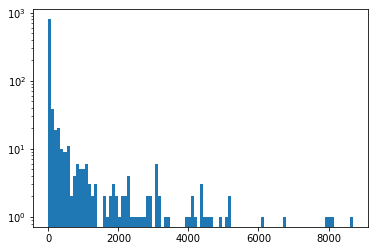

In [52]:
plt.hist(results['queries'], bins=100)
_ = plt.yscale('log')

<BarContainer object of 2 artists>

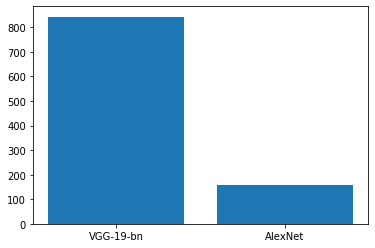

In [38]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])

## GDAS, $\eta$ = 0.1

In [53]:
experiment_filename = '2019-12-15.22-23-oco-100.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

Failure rate: 0.144
Mean queries: 684.4836448598131
Median queries: 14.0


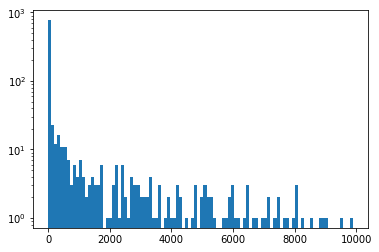

In [54]:
plt.hist(results['queries'], bins=100)
_ = plt.yscale('log')

<BarContainer object of 2 artists>

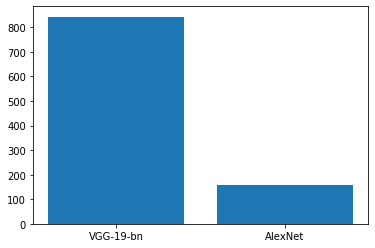

In [55]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])

# Gradient behavio

## Failed attack

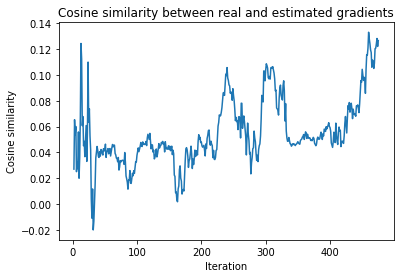

In [111]:
experiment_filename = '2019-12-16.13-47-oco-0.1-grad.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()
results = experiment['results']

gradient_products = results['gradient_products']
true_gradient_norms = results['true_gradient_norms']
estimated_gradient_norms = results['estimated_gradient_norms']

plt.plot(gradient_products[5])
plt.xlabel('Iteration')
plt.ylabel('Cosine similarity')
_ = plt.title('Cosine similarity between real and estimated gradients')

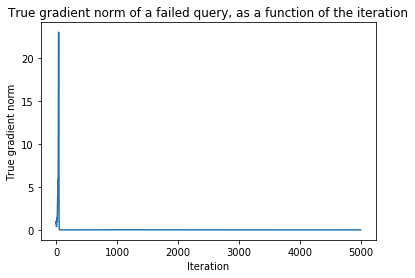

In [116]:
plt.plot(true_gradient_norms[39])
plt.xlabel('Iteration')
plt.ylabel('True gradient norm')
_ = plt.title('True gradient norm of a failed query, as a function of the iteration')

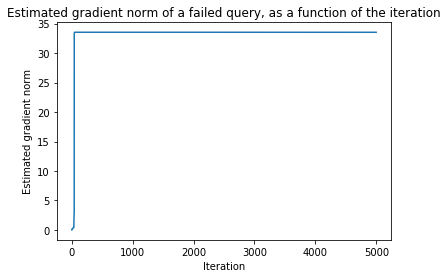

In [115]:
plt.plot(estimated_gradient_norms[39])
plt.xlabel('Iteration')
plt.ylabel('Estimated gradient norm')
_ = plt.title('Estimated gradient norm of a failed query, as a function of the iteration')

## Successful attack

In [117]:
experiment_filename = '2019-12-16.23-28-gradient-successful.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()
results = experiment['results']

gradient_products = results['gradient_products']
true_gradient_norms = results['true_gradient_norms']
estimated_gradient_norms = results['estimated_gradient_norms']

plt.plot(gradient_products[5])
plt.xlabel('Iteration')
plt.ylabel('Cosine similarity')
_ = plt.title('Cosine similarity between real and estimated gradients')

KeyError: 'gradient_products'

In [118]:
experiment

{'experiment_baseline': {'victim_model': 'gdas',
  'reference_model_names': ['vgg11_bn',
   'vgg13_bn',
   'vgg16_bn',
   'vgg19_bn',
   'AlexNet_bn'],
  'dataset': 'CIFAR-10',
  'loss': 'CrossEntropy'},
 'hyperparameters': {'tau': 0.03137254901960784,
  'epsilon': 1,
  'delta': 0.1,
  'eta': 0.00392156862745098,
  'eta_g': 0.1},
 'settings': {'n_images': 1,
  'image_limit': 10000,
  'compare_gradients': False,
  'gpu': False,
  'seed': 0},
 'results': {'queries': array([-1]),
  'total_time': 1589.03599858284,
  'final_model': ['VGG-19-bn']}}

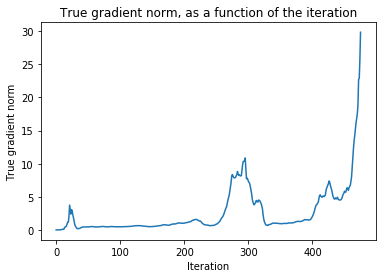

In [112]:
plt.plot(true_gradient_norms[5])
plt.xlabel('Iteration')
plt.ylabel('True gradient norm')
_ = plt.title('True gradient norm, as a function of the iteration')

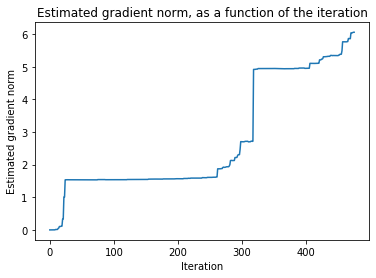

In [113]:
plt.plot(estimated_gradient_norms[5])
plt.xlabel('Iteration')
plt.ylabel('Estimated gradient norm')
_ = plt.title('Estimated gradient norm, as a function of the iteration')